In [2]:
import sys, os
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
from modules.realestate import RealEstateData
from modules.citymap import CityMap
from modules.dynamics import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Download raw data

In [ ]:
# query realestate data from zillow api
#RealEstateData.download(df['ZIP CODE'].unique())

# Load property value data from file

In [ ]:
# load real estate values
mvalfah = pd.concat(RealEstateData('../chicago/realestate.hdf'), axis=1)

# normalize and detrend realestate value data
detrended_mvalfah = detrend(normalize_by_baseline(mvalfah, baseline_length=1))

# evaluate rate of change
mvalfah_rate_of_change = differentiate(detrended_mvalfah)

# Plot maps

These are the current property values for each zipcode in Chicago. Property values are higher on the North and West sides of the city than on the South side.

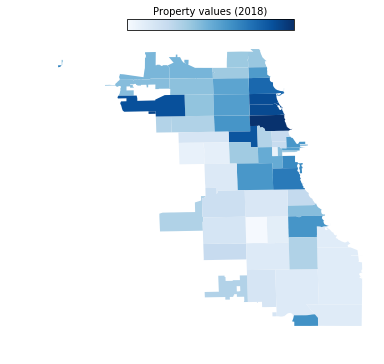

In [6]:
date = '2018'
chimap = CityMap(mvalfah, dirpath='../chicago', vmin='min', vmax='max', timeline=False, label='Property values ({:s})'.format(date))
chimap.fix_date(date)

These a normalized, detrended, log2-transformed fold changes in property value since 1996. They reflect a change in value relative to the market average. Clearly the North side of the city overperformed over that time period while the south side underperformed.

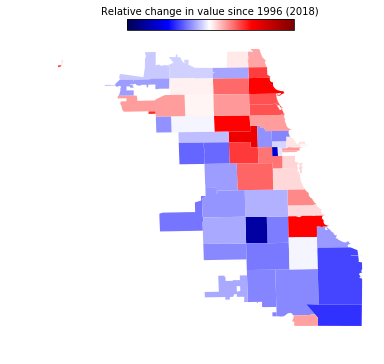

In [7]:
date = '2018'
chimap = CityMap(detrended_mvalfah, dirpath='../chicago', vmin=-1.5, vmax=1.5, timeline=False, cmap=plt.cm.seismic,
                 label='Relative change in value since 1996 ({:s})'.format(date))
chimap.fix_date(date)

# Animated choropleths

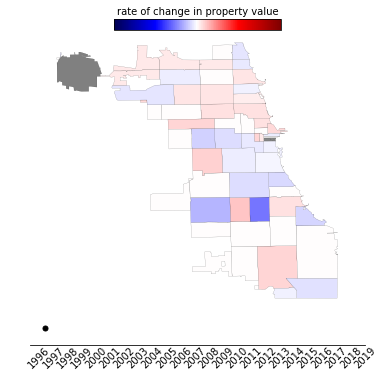

In [117]:
chimap = CityMap(timeseries=mvalfah_rate_of_change, 
            dirpath='../chicago',
            cbar=True, figsize=(6, 6), 
            vmin=-.1, vmax=.1, 
            cmap=plt.cm.seismic, label='rate of change in property value',
            edgecolor='k', lw=0.1, bg='grey')

In [118]:
# save animation as video
chimap.animate('./videos/derivatives.mp4')

This video depicts the rate of change in property values over the past two decades. The shaded values are the time-derivatives of the normalized, detrended, log2-transformed fold changes in property value.

In [8]:
%%HTML
<video width="640" height="480" controls>
  <source src="../videos/derivatives.mp4" type="video/mp4">
</video>

# Property value dynamics
Neighborhoods have deviated overtime. The highest overall performer relative to its 1996 level is 60622.

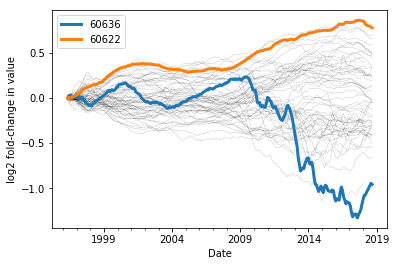

In [9]:
# plot property value dynamics
fig, ax = plt.subplots()
detrended_mvalfah.plot(ax=ax, legend=False, color='k', lw=0.1)
ax.set_ylabel('log2 fold-change in value')

# overlay worst and best performer (overall since 1996)
endpoint = detrended_mvalfah.iloc[-1]
worst, best = endpoint.idxmin(), endpoint.idxmax()
detrended_mvalfah.loc[:, [worst, best]].plot(ax=ax, lw=3)